In [ ]:
! pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym

In [2]:
import os, sys
import gymnasium as gym
import time
import numpy as np
import random
from collections import defaultdict
import text_flappy_bird_gym
from agents import *
from utils import *
import itertools

# 1) Q-Learning & Expected SARSA agents

## 1.1) Q-Learning

In [17]:
# Training pipeline
params = {
    "epsilon": 0.2,
    "epsilon_decay": "linear",
    "step_size": 0.1,
    "gamma": 1
}
n_episodes = 20000
q_learner = QLearningAgent(n_episodes=n_episodes, params=params)
res = q_learner.train()

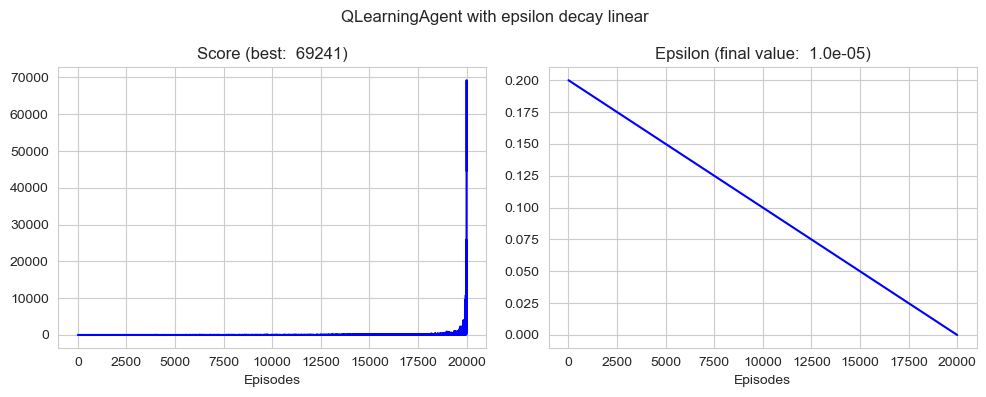

In [18]:
plot_results(res)

In [26]:
res = read_results("QLearningAgentlr0.1_eps0.2_declinear_gamma1_20000", "./results/")

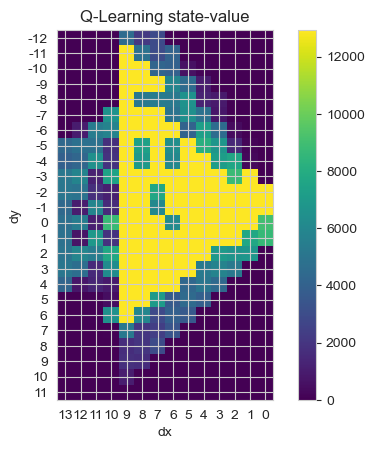

In [27]:
q = res["Q"]
get_state_value_plot(q, "Q-Learning state-value")

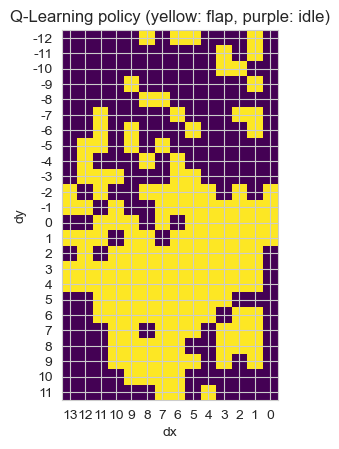

In [29]:
plot_optimal_policy(q, "Q-Learning policy (yellow: flap, purple: idle)", gradient = False)

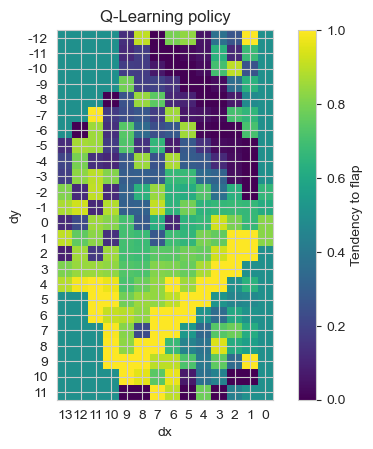

In [30]:
plot_optimal_policy(q, "Q-Learning policy", gradient = True)

## 1.2) Expected SARSA

In [20]:
params = {
    "epsilon": 0.2,
    "epsilon_decay": "linear",
    "step_size": 0.2,
    "gamma": 1
}
n_episodes = 20000
exp_sarsa = ExpectedSARSAAgent(n_episodes=n_episodes, params=params)
res = exp_sarsa.train()

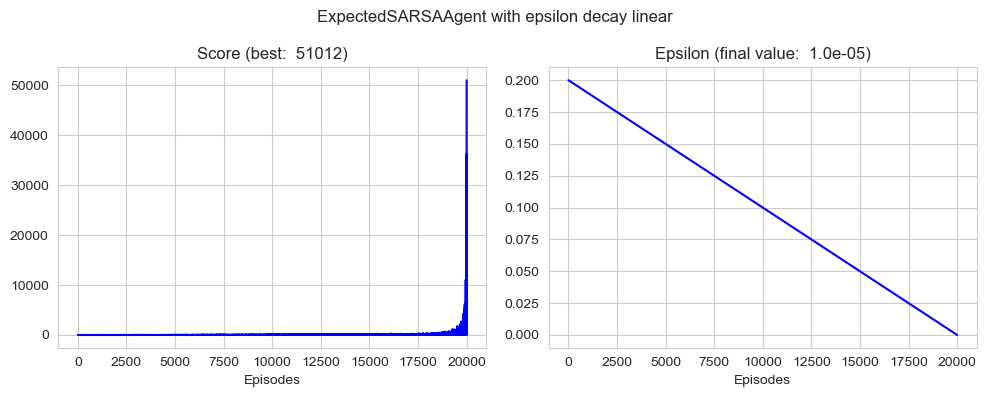

In [21]:
plot_results(res)

In [22]:
res = read_results("ExpectedSARSAAgentlr0.2_eps0.2_declinear_gamma1_20000bis", "./results/")

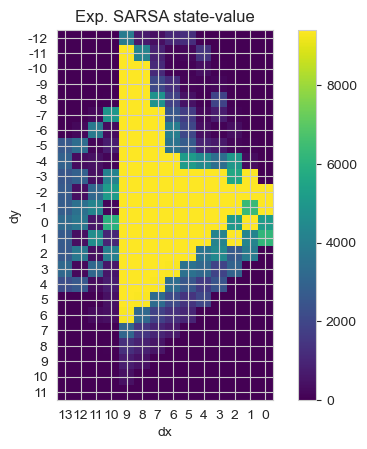

In [23]:
q = res["Q"]
get_state_value_plot(q, "Exp. SARSA state-value")

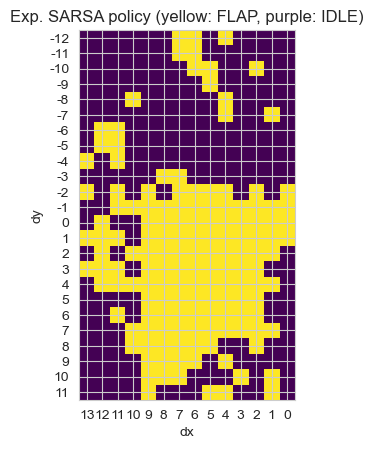

In [24]:
plot_optimal_policy(q, "Exp. SARSA policy (yellow: FLAP, purple: IDLE)", gradient = False)

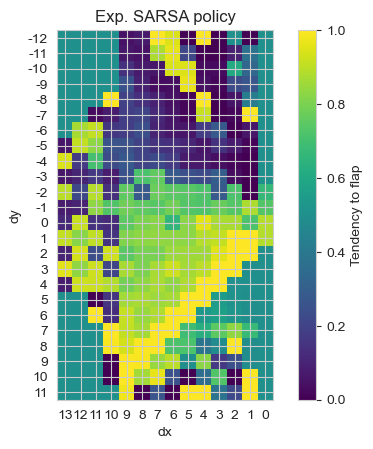

In [25]:
plot_optimal_policy(q, "Exp. SARSA policy", gradient = True)

## 1.3) Parameter sweep (results stored in json files)

In [4]:
grid = {
    "agent_type": ["QLearningAgent", "ExpectedSARSAAgent"],
    "num_episodes": [5000, 10000],
    "epsilon_decay": ["exponential", "linear", "none"],
    "step_size": [0.01, 0.05, 0.2],
    "epsilon": [0.1, 0.2, 0.5],
    "gamma": [1]
}

In [5]:
hyperparam_tuning(grid,save_res=True)

QLearningAgent * Best: 1 * Params: {'epsilon': 0.1, 'epsilon_decay': 'exponential', 'step_size': 0.01, 'gamma': 1} * Episodes: 5000
QLearningAgent * Best: 3 * Params: {'epsilon': 0.2, 'epsilon_decay': 'exponential', 'step_size': 0.01, 'gamma': 1} * Episodes: 5000
QLearningAgent * Best: 5 * Params: {'epsilon': 0.5, 'epsilon_decay': 'exponential', 'step_size': 0.01, 'gamma': 1} * Episodes: 5000
QLearningAgent * Best: 4 * Params: {'epsilon': 0.1, 'epsilon_decay': 'exponential', 'step_size': 0.05, 'gamma': 1} * Episodes: 5000
QLearningAgent * Best: 8 * Params: {'epsilon': 0.2, 'epsilon_decay': 'exponential', 'step_size': 0.05, 'gamma': 1} * Episodes: 5000
QLearningAgent * Best: 9 * Params: {'epsilon': 0.5, 'epsilon_decay': 'exponential', 'step_size': 0.05, 'gamma': 1} * Episodes: 5000
QLearningAgent * Best: 489 * Params: {'epsilon': 0.1, 'epsilon_decay': 'exponential', 'step_size': 0.2, 'gamma': 1} * Episodes: 5000
QLearningAgent * Best: 91 * Params: {'epsilon': 0.2, 'epsilon_decay': 'expo

# 2) N-Step SARSA

## 2.1) N-Step SARSA: Training pipeline

In [ ]:
N_EPISODES = 20000

params = {
    "epsilon": 0.2,
    "epsilon_decay": "linear",
    "step_size": 0.2,
    "gamma": 0.8,
    "n": 4
}

sarsa = nStepSARSAAgent(N_EPISODES, params)
res = sarsa.train()

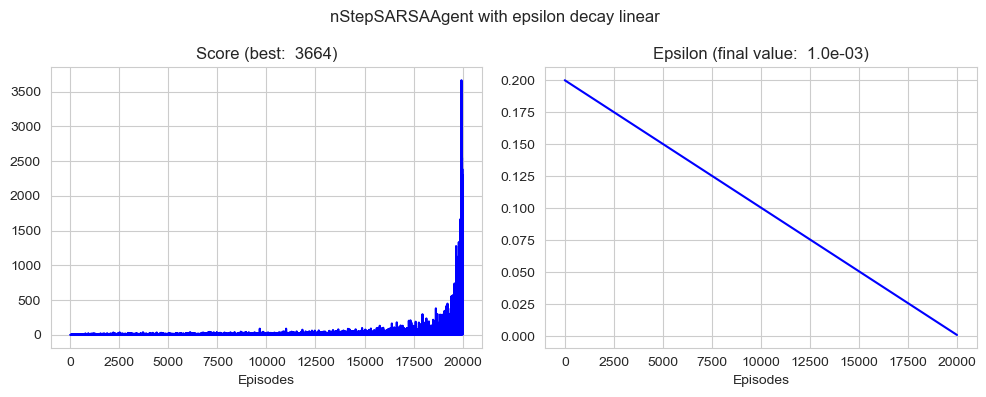

In [18]:
plot_results(res)

## 2.2) Parameter sweep (results stored in json files)

In [3]:
grid = {
    "agent_type": ["nStepSARSAAgent"],
    "n_episodes": [5000, 10000],
    "epsilon_decay": ["linear", "none", "exponential"],
    "step_size": [0.01, 0.05, 0.2],
    "epsilon": [0.1, 0.2, 0.5],
    "gamma": [1]
}

hyperparam_tuning(grid, n_values=[2, 3, 4], save_res=True, results_path="./results/Sweep2/")

nStepSARSAAgent * Best: 4 * Params: {'epsilon': 0.1, 'epsilon_decay': 'linear', 'step_size': 0.01, 'gamma': 1, 'n': 2} * Episodes: 5000
nStepSARSAAgent * Best: 7 * Params: {'epsilon': 0.1, 'epsilon_decay': 'linear', 'step_size': 0.01, 'gamma': 1, 'n': 3} * Episodes: 5000
nStepSARSAAgent * Best: 8 * Params: {'epsilon': 0.1, 'epsilon_decay': 'linear', 'step_size': 0.01, 'gamma': 1, 'n': 4} * Episodes: 5000
nStepSARSAAgent * Best: 5 * Params: {'epsilon': 0.2, 'epsilon_decay': 'linear', 'step_size': 0.01, 'gamma': 1, 'n': 2} * Episodes: 5000
nStepSARSAAgent * Best: 11 * Params: {'epsilon': 0.2, 'epsilon_decay': 'linear', 'step_size': 0.01, 'gamma': 1, 'n': 3} * Episodes: 5000
nStepSARSAAgent * Best: 43 * Params: {'epsilon': 0.2, 'epsilon_decay': 'linear', 'step_size': 0.01, 'gamma': 1, 'n': 4} * Episodes: 5000
nStepSARSAAgent * Best: 49 * Params: {'epsilon': 0.5, 'epsilon_decay': 'linear', 'step_size': 0.01, 'gamma': 1, 'n': 2} * Episodes: 5000
nStepSARSAAgent * Best: 80 * Params: {'epsilo

KeyboardInterrupt: 

In [11]:
sweep2_files = os.listdir("./results/Sweep2/")
n2 = []
n3 = []
n4 = []
score_dict = {
    (2, 0.01): [],
    (2, 0.05): [],
    (2, 0.2): [],
    (3, 0.01): [],
    (3, 0.05): [],
    (3, 0.2): [],
    (4, 0.01): [],
    (4, 0.05): [],
    (4, 0.2): []
}
for name in sweep2_files:
    file_no_ext = name[:-5]
    res = read_results(file_no_ext, "./results/Sweep2/")
    n = res["params"]["n"]
    lr = res["params"]["step_size"]
    score_dict[(n, lr)].append(res["best_score"])

# Average score for n, lr combinations (for table in report)
{key: np.mean(val) for key, val in score_dict.items()}

## 2.3) Plots

In [23]:
res = read_results("nStepSARSAAgent4_lr0.2_eps0.2_declinear_gamma0.8_20000", "./results/")

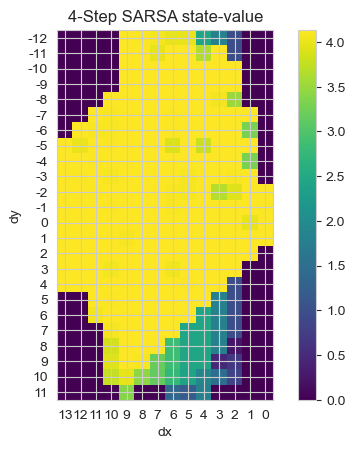

In [24]:
q = res["Q"]
get_state_value_plot(q, "4-Step SARSA state-value")

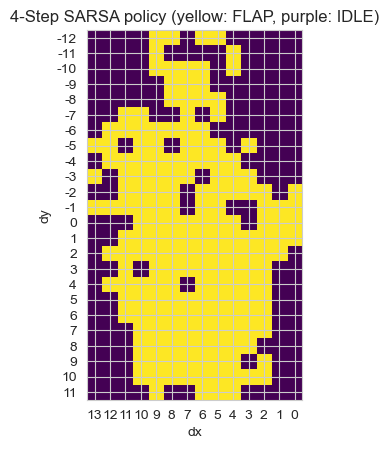

In [26]:
plot_optimal_policy(q, "4-Step SARSA policy (yellow: FLAP, purple: IDLE)", gradient = False)

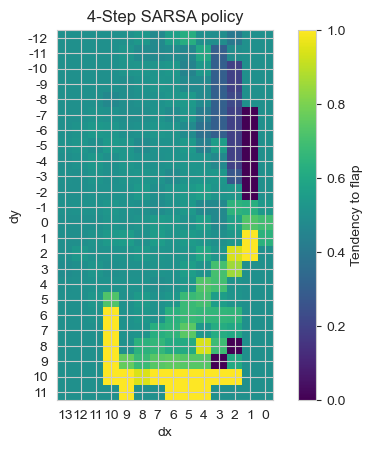

In [27]:
plot_optimal_policy(q, "4-Step SARSA policy", gradient = True)

# 3) Comparison

## 3.1) Comparison of runs
Here we will show three runs for 10000 episodes and compare their performance.

In [8]:
params = {
    "epsilon": 0.2,
    "epsilon_decay": "linear",
    "step_size": 0.2,
    "gamma": 1
}
n_episodes = 10000
q_learner = QLearningAgent(n_episodes=n_episodes, params=params)
res_qlearner = q_learner.train()

In [9]:
params = {
    "epsilon": 0.2,
    "epsilon_decay": "linear",
    "step_size": 0.2,
    "gamma": 1
}
n_episodes = 10000
exp_sarsa = ExpectedSARSAAgent(n_episodes=n_episodes, params=params)
res_expsarsa = exp_sarsa.train()

In [11]:
params = {'epsilon': 0.1, 'epsilon_decay': 'exponential', 'step_size': 0.2, 'gamma': 1, 'n': 3}
n_episodes = 10000
n_sarsa = nStepSARSAAgent(n_episodes=n_episodes, params=params)
res_nsarsa = n_sarsa.train()

In [28]:
res_qlearner = read_results("QLearningAgentlr0.1_eps0.2_declinear_gamma1_20000", "./results/")
res_esarsa = read_results("ExpectedSARSAAgentlr0.2_eps0.2_declinear_gamma1_20000bis", "./results/")
res_nsarsa = read_results("nStepSARSAAgent4_lr0.2_eps0.2_declinear_gamma0.8_20000", "./results/")

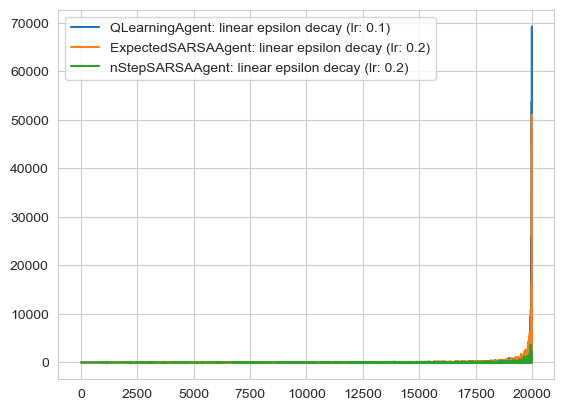

In [58]:


fig=plt.figure()
#plt.plot(np.arange(len(res_qlearner["scores"])), res_qlearner["scores"])
#plt.plot(np.arange(len(res_esarsa["scores"])), res_esarsa["scores"])
#plt.plot(np.arange(len(res_nsarsa["scores"])),res_nsarsa["scores"])
legend = []
for i, res in enumerate([res_qlearner, res_esarsa, res_nsarsa]):
    plt.plot(np.arange(len(res["scores"])),np.array(res["scores"]), ls = "-")
    if i == 0:
        legend.append(res["agent_type"]+": linear epsilon decay (lr: 0.1)")
    else:
        legend.append(res["agent_type"]+": linear epsilon decay (lr: 0.2)")
plt.legend(legend)